In [1]:
#1: Using Venn Diagrams to Visualize Relationships Between Sets

In [2]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from sympy import FiniteSet

In [3]:
def draw_venn(sets):
    venn2(subsets=sets,set_labels=('Football','Other'))
    plt.show()

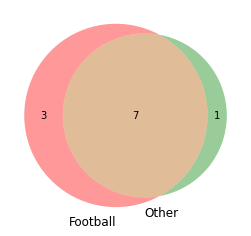

In [4]:
if __name__=="__main__":
    s1=FiniteSet(1,3,5,7,9,11,13,15,17,19)
    s2=FiniteSet(2,3,5,7,11,13,17,19)
    draw_venn([s1,s2])

In [5]:
import csv
def read_csv(filename):
    football,others=[],[]
    with open(filename) as f:
        reader=csv.reader(f)
        next(reader)
        for row in reader:
            if row[1]=='1':
                football.append(row[0])
            if row[2]=='1':
                others.append(row[0])
    return football,others

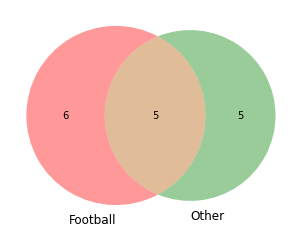

In [6]:
if __name__=="__main__":
    football_players,other_players=read_csv('sports.csv')
    football_players=FiniteSet(*football_players)
    other_players=FiniteSet(*other_players)
    draw_venn([football_players,other_players])

In [7]:
#2: Law of Large Numbers
e = 1*(1/6) + 2*(1/6) + 3*(1/6) + 4*(1/6) + 5*(1/6) + 6*(1/6)
e 


3.5

In [8]:
import random
def roll():
    return random.randint(1,6)

In [9]:
def average(trial_count):
    sum=0
    for _ in range(trial_count):
        sum+=roll()
    return sum/trial_count

In [11]:
if __name__=="__main__":
    e = 1*(1/6) + 2*(1/6) + 3*(1/6) + 4*(1/6) + 5*(1/6) + 6*(1/6)
    print("Expected value: {}".format(e)) 
    for trial_count in [100,1000,10000,100000,500000]:
        trial_average=average(trial_count)
        print('Trial: {} Trial average {}'.format(trial_count,trial_average))

Expected value: 3.5
Trial: 100 Trial average 3.27
Trial: 1000 Trial average 3.508
Trial: 10000 Trial average 3.4809
Trial: 100000 Trial average 3.50567
Trial: 500000 Trial average 3.497338


In [12]:
#3: How Many Tosses Before You Run Out of Money?

In [17]:
if __name__=="__main__":
    amount=int(input('Enter starting amount: '))
    toss_count=0
    while amount>0:
        toss_count+=1
        heads=random.randint(0,1)
        if heads:
            amount+=1
            print('Heads! Current amount: {}'.format(amount))
        else:
            amount-=1.5
            print('Tails! Current amount: {}'.format(amount))
    print('Game over :( Current amount: {}. Coin tosses: {}'.format(amount,toss_count))

Enter starting amount: 10
Tails! Current amount: 8.5
Tails! Current amount: 7.0
Heads! Current amount: 8.0
Heads! Current amount: 9.0
Tails! Current amount: 7.5
Tails! Current amount: 6.0
Tails! Current amount: 4.5
Heads! Current amount: 5.5
Heads! Current amount: 6.5
Tails! Current amount: 5.0
Tails! Current amount: 3.5
Tails! Current amount: 2.0
Heads! Current amount: 3.0
Heads! Current amount: 4.0
Tails! Current amount: 2.5
Tails! Current amount: 1.0
Tails! Current amount: -0.5
Game over :( Current amount: -0.5. Coin tosses: 17


In [ ]:
#4 Shuffling a deck of cards

In [18]:
cards=[i for i in range(1,53)]#representing via numbers
random.shuffle(cards)
cards

[3,
 15,
 28,
 26,
 45,
 8,
 4,
 7,
 6,
 16,
 27,
 31,
 19,
 18,
 10,
 29,
 14,
 38,
 37,
 32,
 23,
 35,
 25,
 48,
 2,
 9,
 33,
 49,
 51,
 5,
 46,
 21,
 34,
 40,
 20,
 36,
 24,
 42,
 12,
 30,
 47,
 41,
 50,
 11,
 39,
 44,
 17,
 1,
 43,
 13,
 22,
 52]

In [23]:
class Card:
    def __init__(self,suit,rank):
        self.suit=suit
        self.rank=str(rank)
    def __repr__(self):
        return '{} of {}'.format(self.rank,self.suit)

In [24]:
if __name__=="__main__":
    ranks=['Ace',2,3,4,5,6,7,8,9,10,'Jack','Queen','King']
    suits=['Hearts','Spades','Diamonds','Clubs']
    cards=[Card(suit,rank) for suit in suits for rank in ranks]
    random.shuffle(cards)
    for card in cards:
        print(card)

Jack of Hearts
King of Spades
Queen of Spades
2 of Diamonds
5 of Clubs
3 of Spades
4 of Diamonds
5 of Hearts
Queen of Hearts
King of Clubs
King of Hearts
2 of Spades
8 of Clubs
Ace of Hearts
Jack of Diamonds
Ace of Clubs
9 of Spades
2 of Hearts
3 of Diamonds
9 of Diamonds
7 of Hearts
9 of Hearts
5 of Spades
7 of Clubs
4 of Hearts
4 of Clubs
6 of Spades
Ace of Diamonds
6 of Diamonds
8 of Diamonds
10 of Clubs
Queen of Diamonds
7 of Diamonds
2 of Clubs
5 of Diamonds
9 of Clubs
6 of Clubs
7 of Spades
6 of Hearts
3 of Hearts
8 of Spades
4 of Spades
8 of Hearts
10 of Diamonds
10 of Spades
Queen of Clubs
10 of Hearts
Jack of Spades
3 of Clubs
Jack of Clubs
Ace of Spades
King of Diamonds


In [25]:
#5: Estimating the Area of a Circle

In [47]:
def distance(x,y):
    return (x**2+y**2)**0.5

from math import pi
def estimate(dart_count,r):
    count_in_circle=0
    for _ in range(dart_count):
        x=random.uniform(-r,r)
        y=random.uniform(-r,r)
        if distance(x,y)<=r:
            count_in_circle+=1
    square_size=4*r*r
    ratio_in_circle=count_in_circle/dart_count
    print(ratio_in_circle)
    return square_size*ratio_in_circle

In [48]:

if __name__=="__main__":
    radius=float(input('Radius: '))
    true_area=radius*radius*pi
    for dart_count in [1000,100000,1000000]:
        estimated_area=estimate(dart_count,radius)
        print('Area: {0}, Estimated ({1} darts): {2}'.format(true_area,dart_count,estimated_area))

Radius: 2
0.772
Area: 12.566370614359172, Estimated (1000 darts): 12.352
0.78542
Area: 12.566370614359172, Estimated (100000 darts): 12.56672
0.785738
Area: 12.566370614359172, Estimated (1000000 darts): 12.571808


In [52]:
def pi_estimate(dart_count):
    count_in_circle=0
    for _ in range(dart_count):
        x=random.uniform(-1,1)
        y=random.uniform(-1,1)
        if distance(x,y)<=1:
            count_in_circle+=1
    ratio_in_circle=count_in_circle/dart_count
    return 4*ratio_in_circle

In [54]:

if __name__=="__main__":
    print('True pi value: {}'.format(pi) )
    for dart_count in [1000,100000,1000000,10000000]:
        estimated_pi=pi_estimate(dart_count)
        print('Estimated ({0} darts): {1}'.format(dart_count,estimated_pi))

True pi value: 3.141592653589793
Estimated (1000 darts): 3.144
Estimated (100000 darts): 3.13904
Estimated (1000000 darts): 3.144824
Estimated (10000000 darts): 3.1409052
